In [1]:
# Prédire si une personne est infectée par covid-19 en fonction des données cliniques disponibles.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_excel('dataset.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.xlsx'

In [3]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [5]:
df = data.copy()
df.shape

(5644, 111)

<AxesSubplot:>

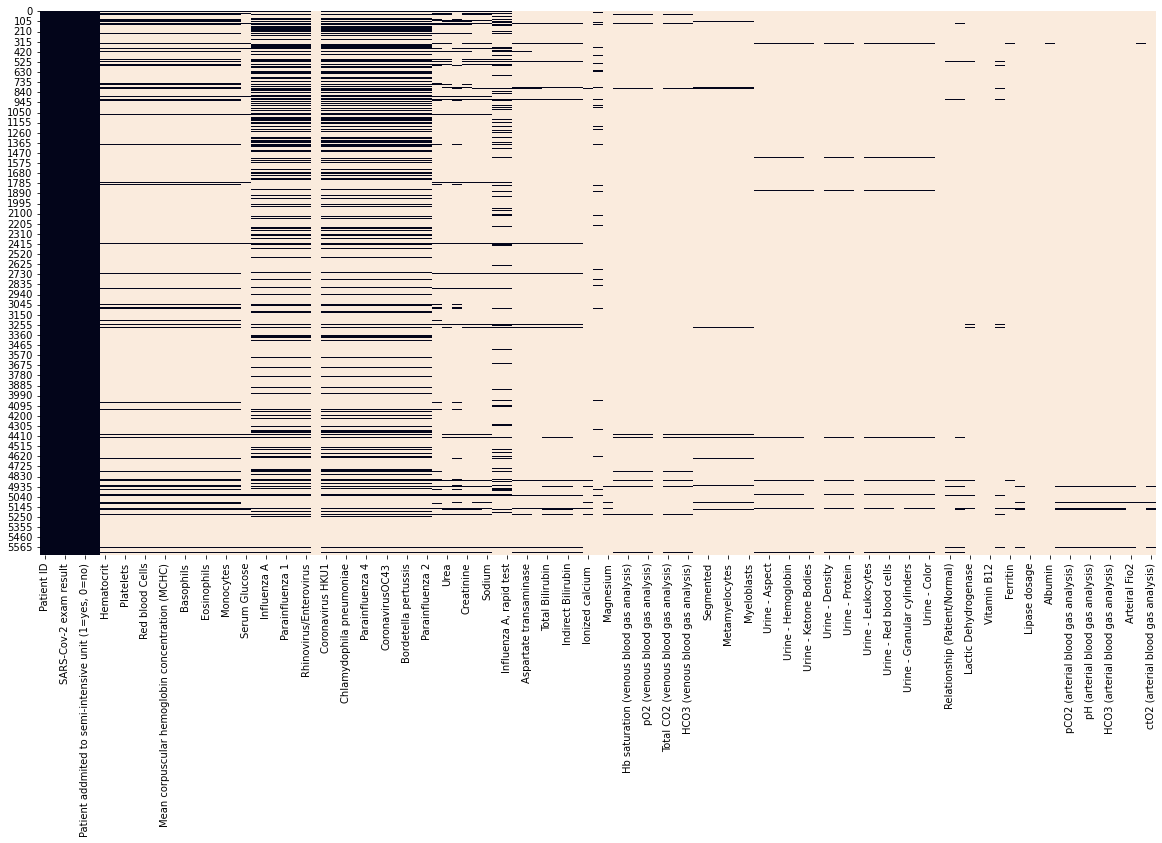

In [6]:
df.dtypes.value_counts()
df.isna() 
plt.figure(figsize=(20,10))
sns.heatmap(df.isna() , cbar=False)

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64

In [8]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]]

In [9]:
df=df.drop('Patient ID', axis=1)

In [10]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

     Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
0           NaN              NaN              NaN              NaN   
1  not_detected     not_detected     not_detected     not_detected   
2           NaN              NaN              NaN              NaN   
3           NaN              NaN              NaN              NaN   
4  not_detected     not_detected     not_detected     not_detected   

   Inf A H1N1 2009  Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0              NaN                   NaN              NaN              NaN   
1     not_detected          not_detected     not_detected     not_detected   
2              NaN                   NaN              NaN              NaN   
3              NaN                   NaN              NaN              NaN   
4     not_detected          not_detected     not_detected     not_detected   

   Influenza B, rapid test Influenza A, rapid test  
0                      NaN                     NaN  
1                 negative                negative  
2                      NaN                     NaN  
3                      NaN                     NaN  
4                      NaN                     NaN  

[5 rows x 38 columns]

In [11]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

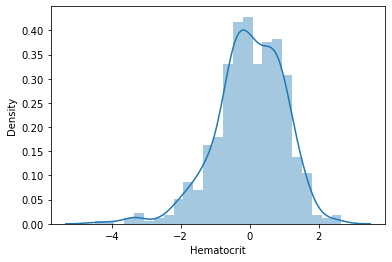

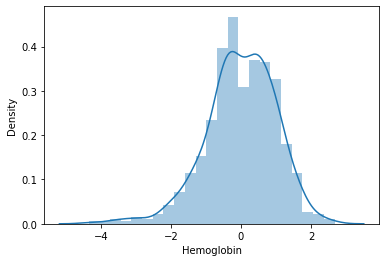

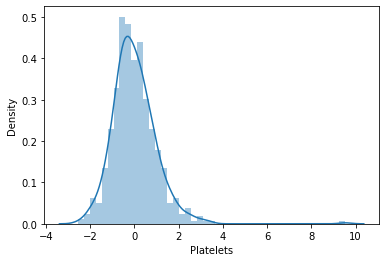

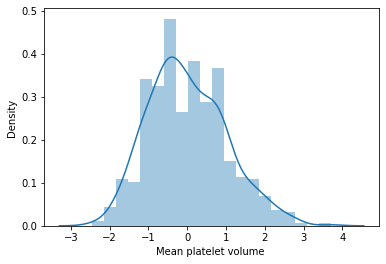

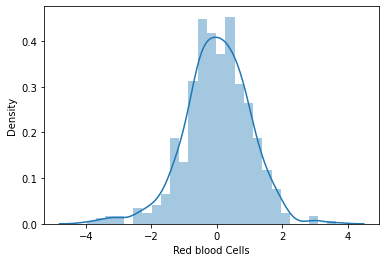

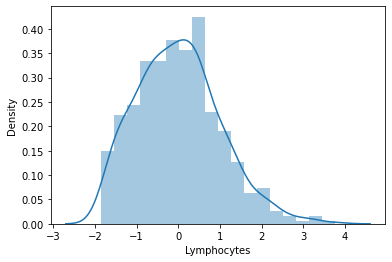

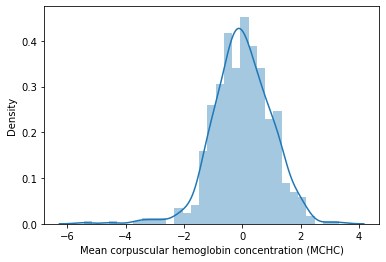

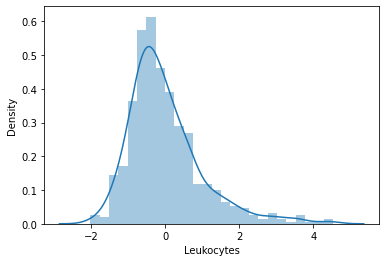

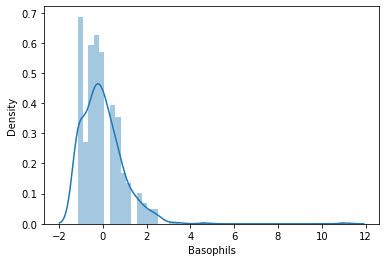

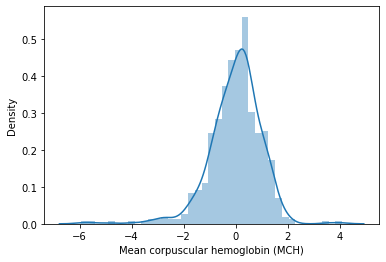

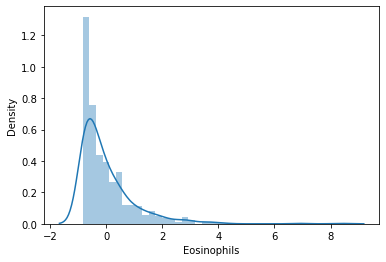

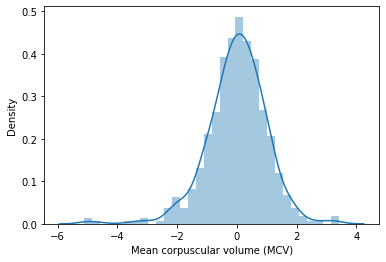

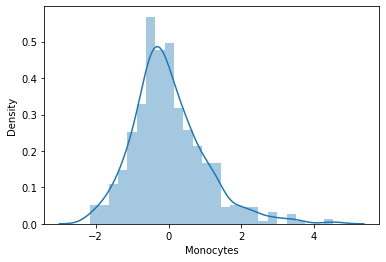

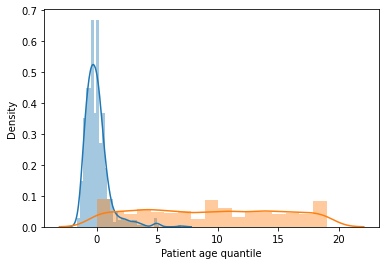

In [12]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])
sns.distplot(df['Patient age quantile'])

In [13]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

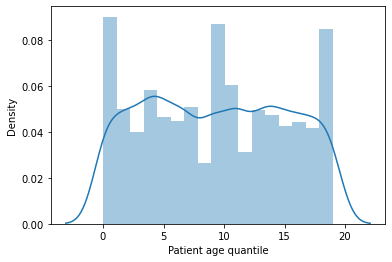

In [14]:
sns.distplot(df['Patient age quantile'])

In [15]:
for col in df.select_dtypes('object'):
 print(f'{col:-<70} {df[col].unique()}')

SARS-Cov-2 exam result------------------------------------------------ ['negative' 'positive']
Respiratory Syncytial Virus------------------------------------------- [nan 'not_detected' 'detected']
Influenza A----------------------------------------------------------- [nan 'not_detected' 'detected']
Influenza B----------------------------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1------------------------------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63------------------------------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------------------------------------ [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------------------------------------ [nan 'not_detected' 'detected']
Parainfluenza 3------------------------------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae---------------------------------------------- [nan 'not_

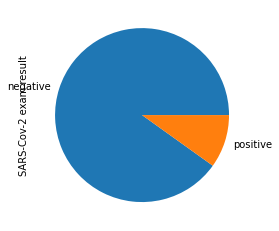

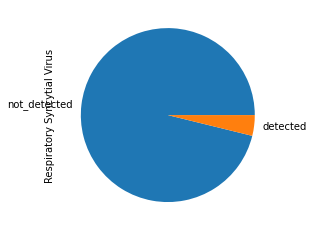

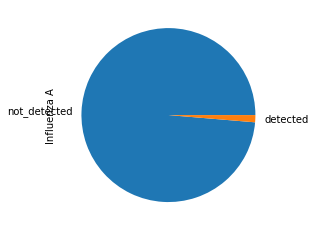

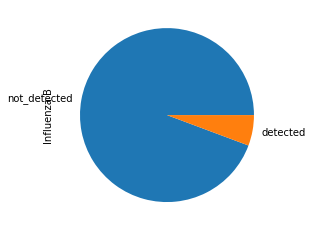

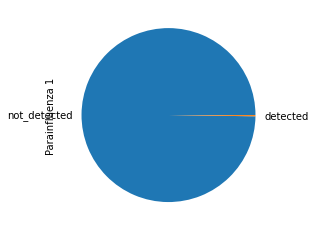

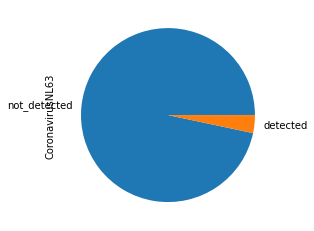

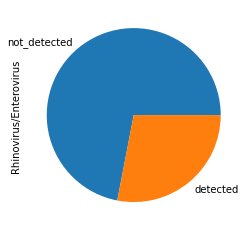

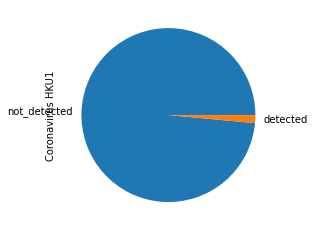

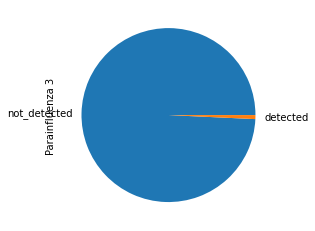

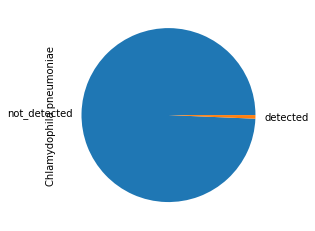

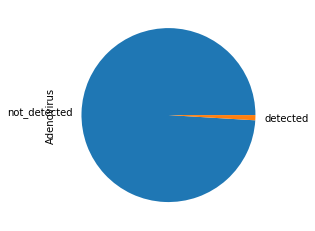

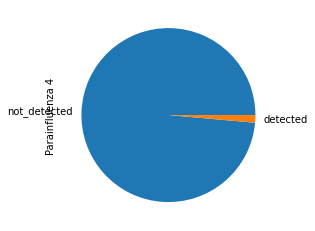

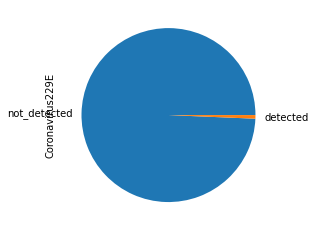

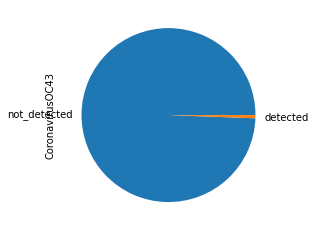

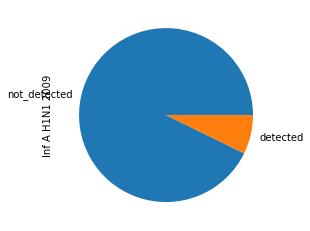

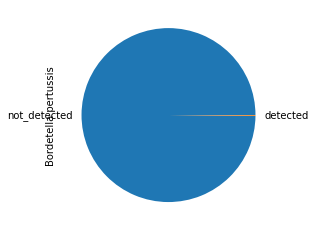

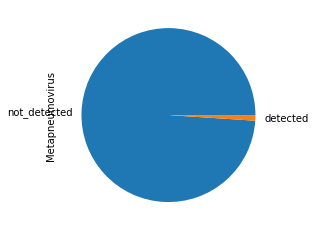

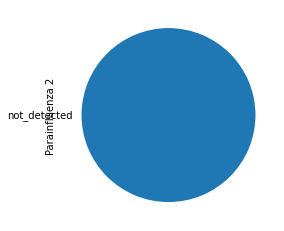

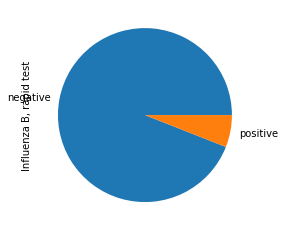

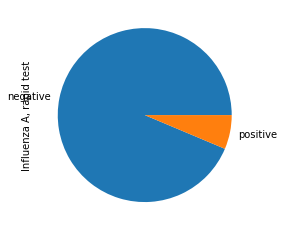

In [16]:
for col in df.select_dtypes('object'):
    
    plt.figure()
    df[col].value_counts().plot.pie()

In [17]:
negative_df=df[df['SARS-Cov-2 exam result']=='negative']
positive_df=df[df['SARS-Cov-2 exam result']=='positive']
missing_rate= df.isna().sum()/df.shape[0]
blood_columns= df.columns[(missing_rate<0.9) & (missing_rate>0.88)]
viral_columns= df.columns[(missing_rate<0.88) & (missing_rate>0.75)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


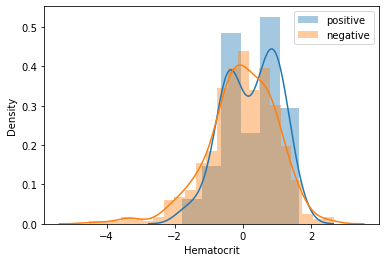

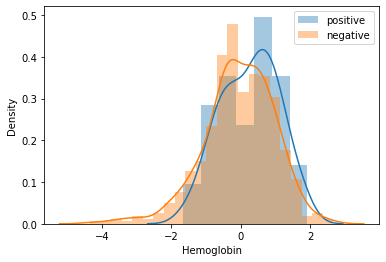

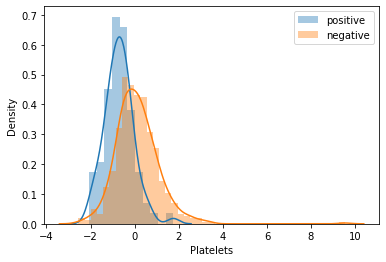

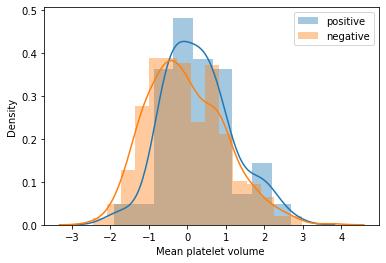

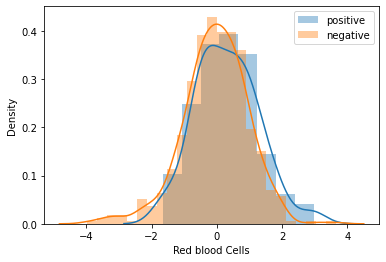

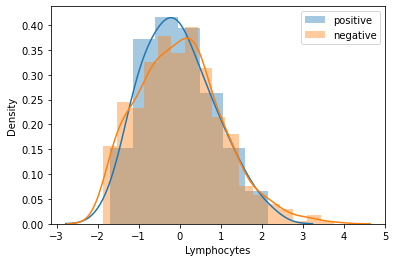

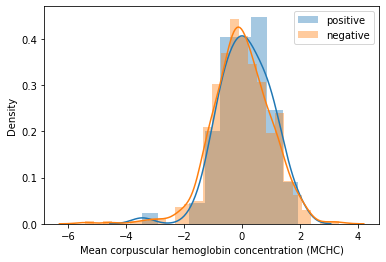

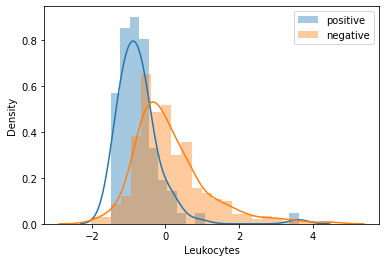

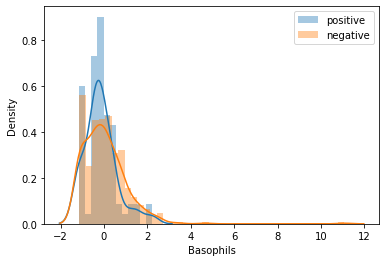

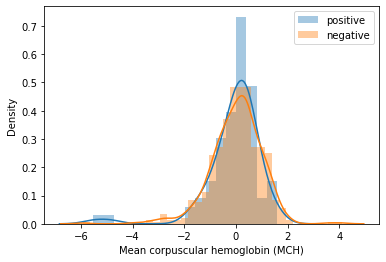

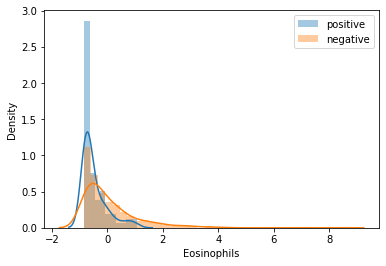

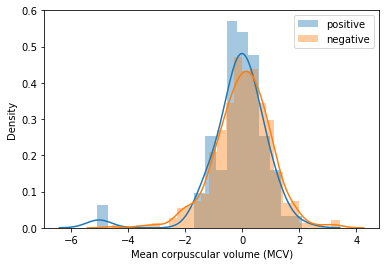

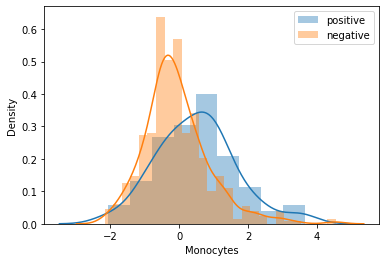

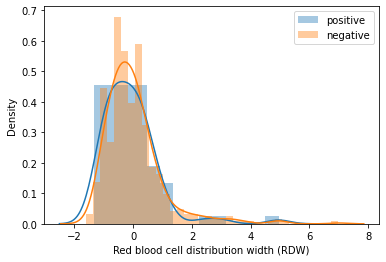

In [18]:
for col in  blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

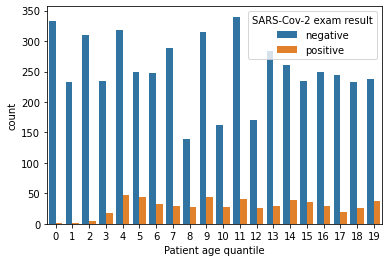

In [19]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result', data=df)

In [20]:
pd.crosstab(df['SARS-Cov-2 exam result'] , df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

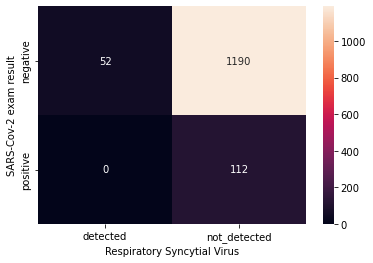

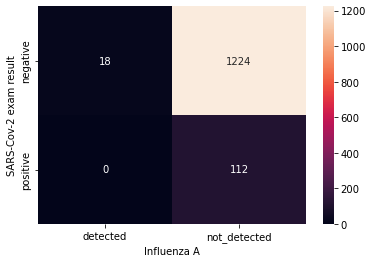

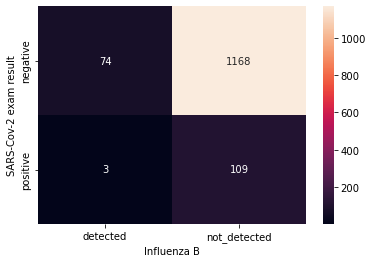

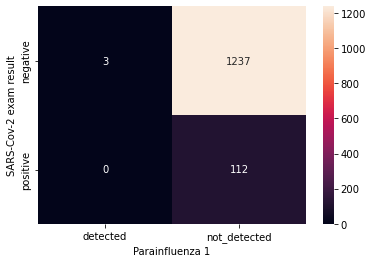

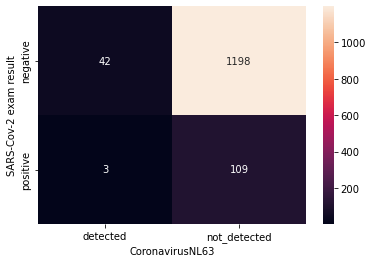

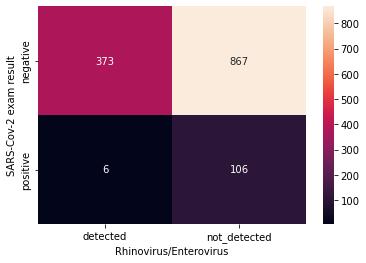

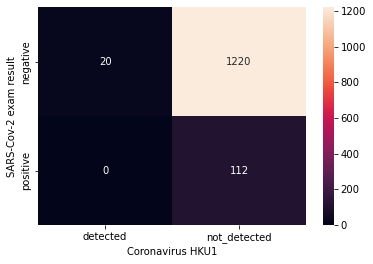

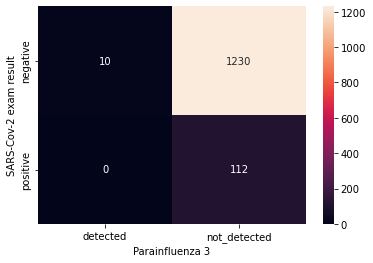

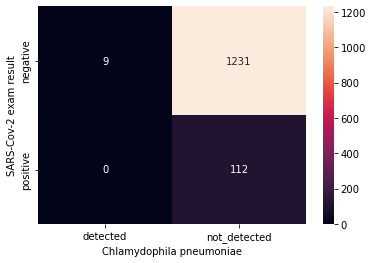

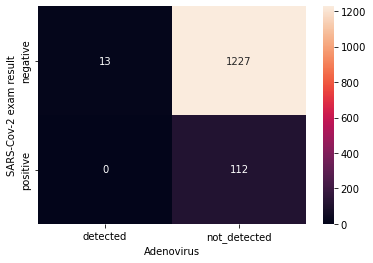

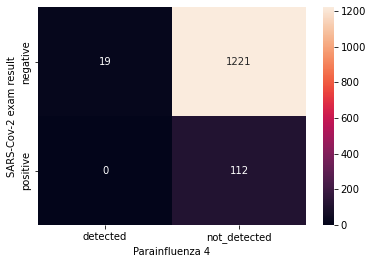

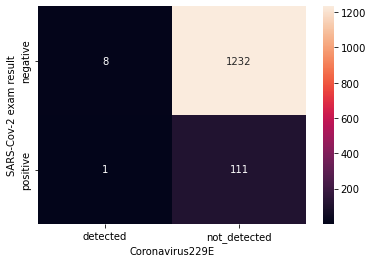

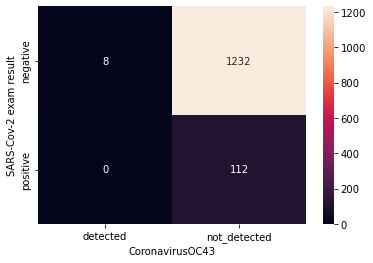

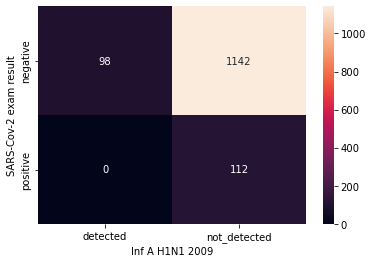

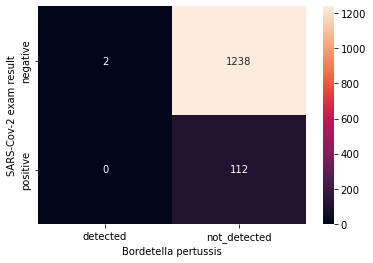

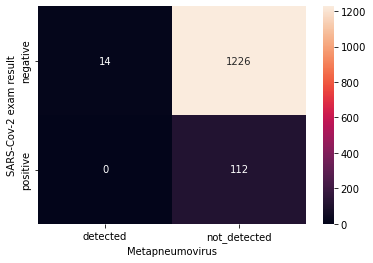

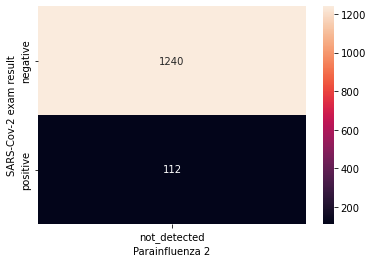

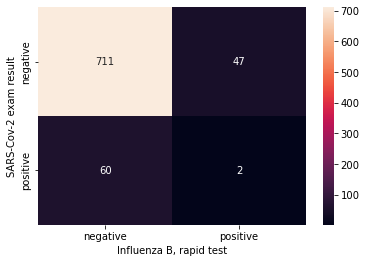

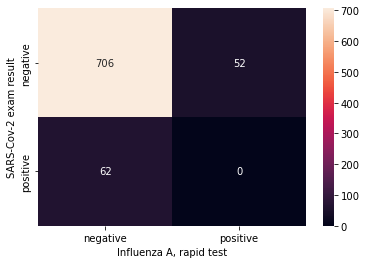

In [21]:
for col in  viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'] , df[col]), annot=True ,fmt='d')

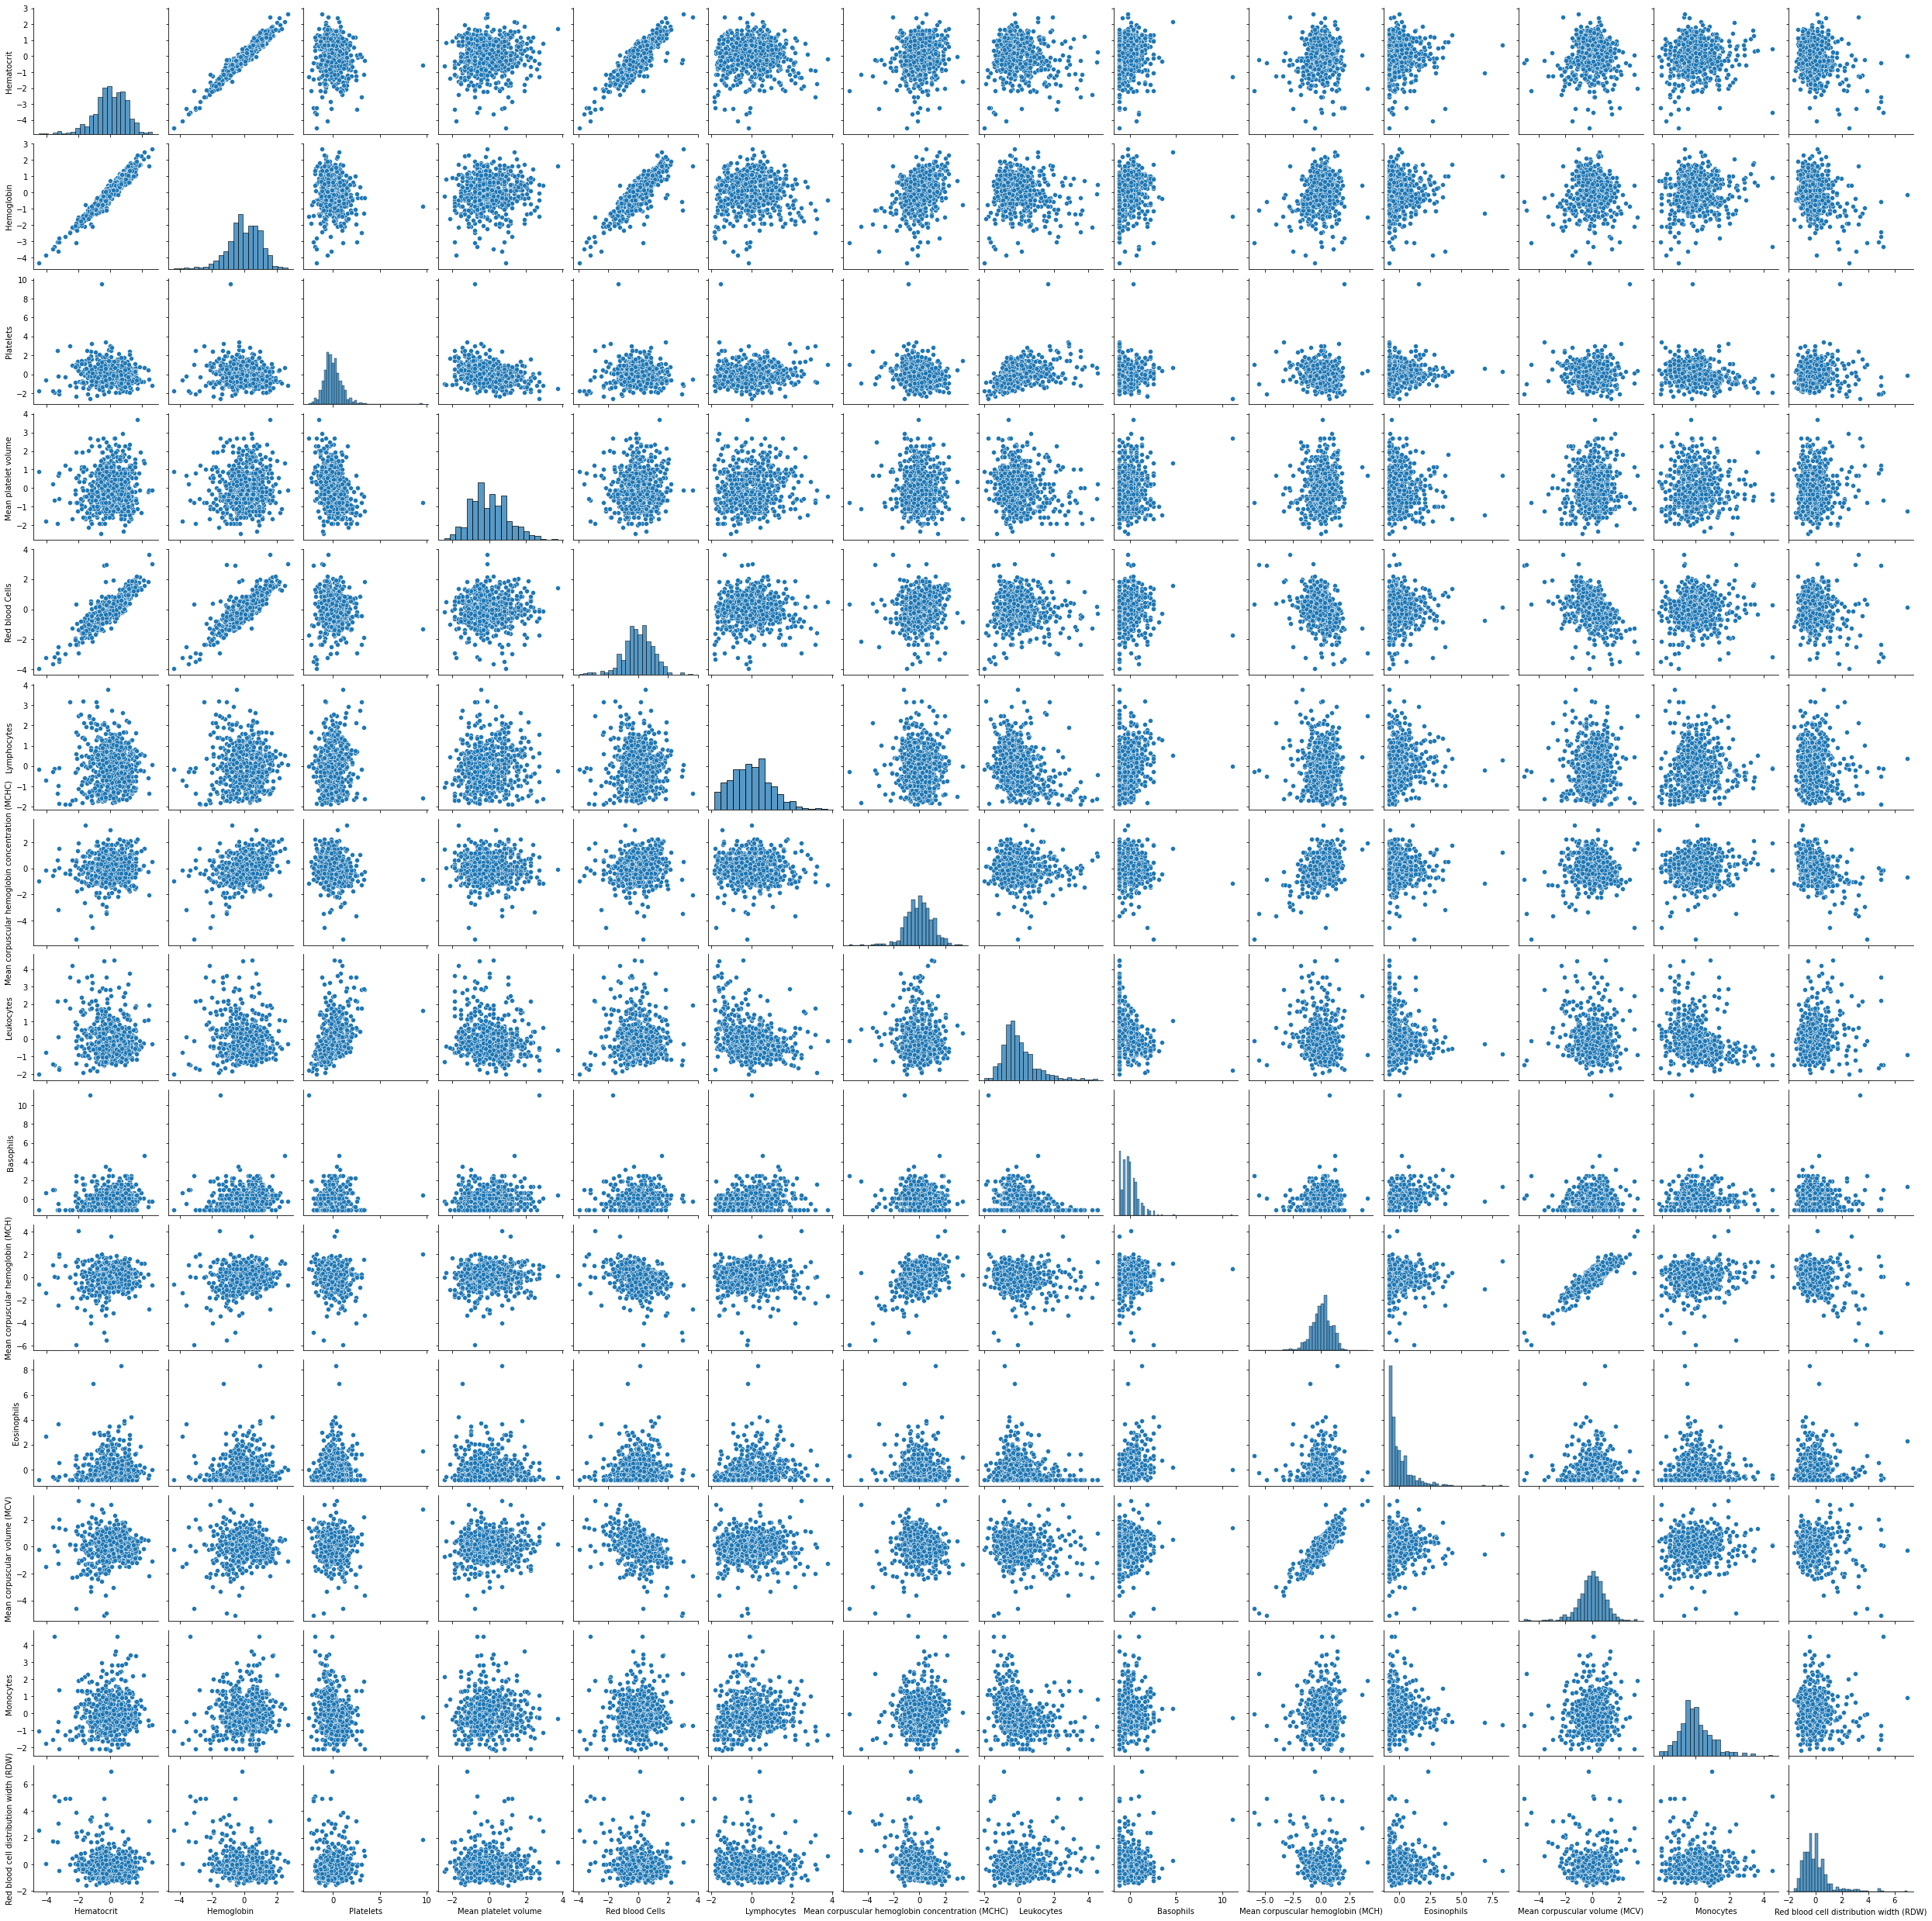

In [22]:
sns.pairplot(df[blood_columns])

<AxesSubplot:>

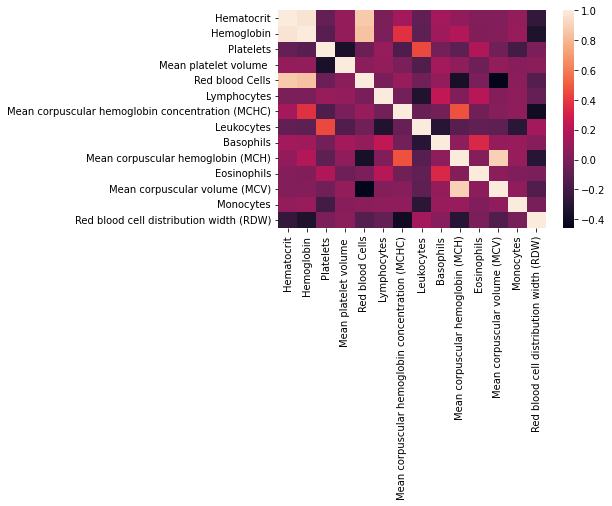

In [23]:
sns.heatmap(df[blood_columns].corr())

C:\Users\ELKHAD~1\AppData\Local\Temp/ipykernel_8620/2844489192.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

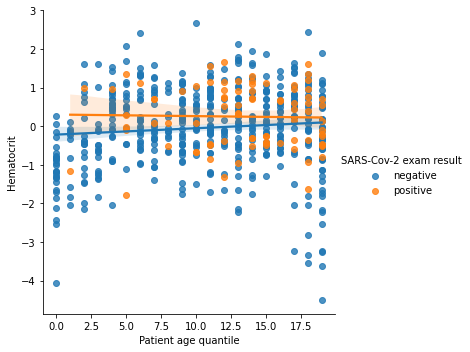

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

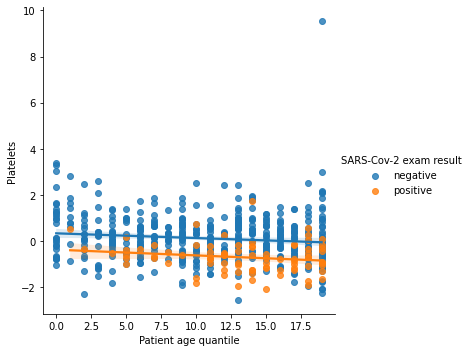

<Figure size 432x288 with 0 Axes>

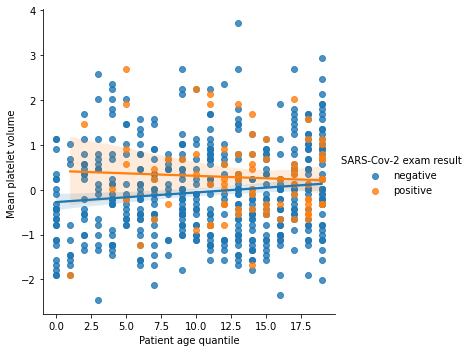

<Figure size 432x288 with 0 Axes>

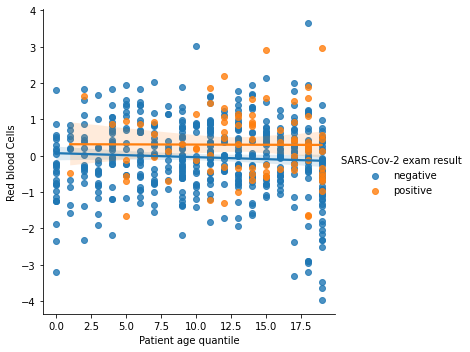

<Figure size 432x288 with 0 Axes>

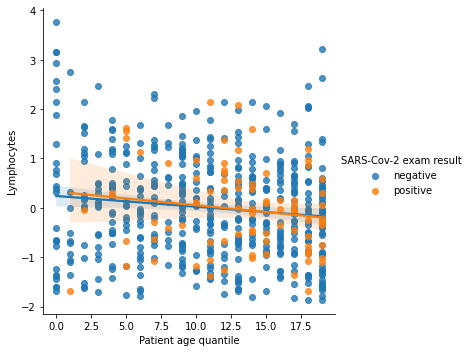

<Figure size 432x288 with 0 Axes>

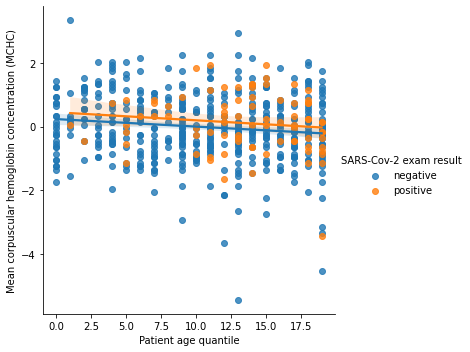

<Figure size 432x288 with 0 Axes>

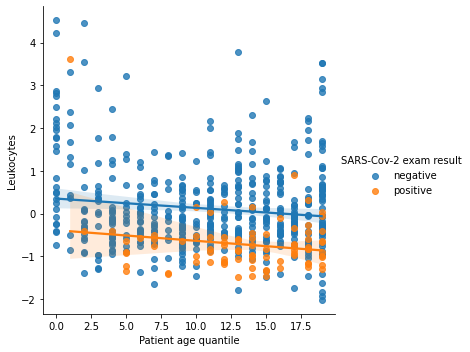

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

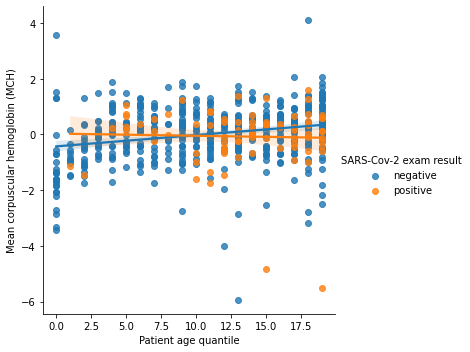

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

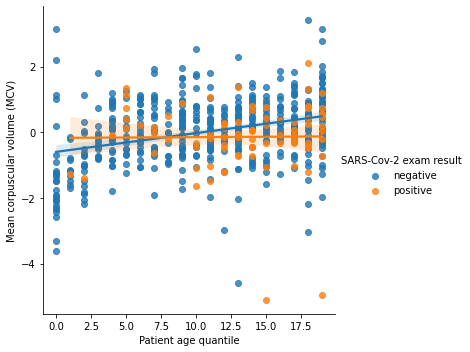

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

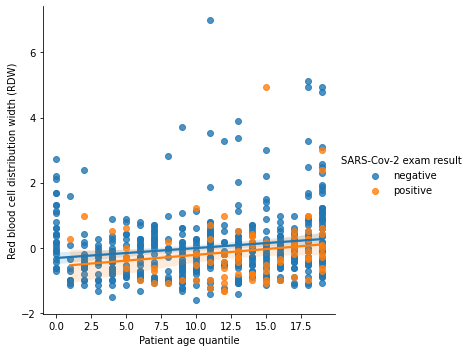

In [24]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col , hue='SARS-Cov-2 exam result', data=df)

In [25]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [26]:
pd.crosstab(df['Influenza A'] , df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [27]:
pd.crosstab(df['Influenza B'] , df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [28]:
df['est malade']=np.sum(df[viral_columns[:-2]]=='detected',axis=1)>=1

In [29]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Parainfluenza 4  Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
0              NaN              NaN              NaN              NaN   
1     not_detected     not_detected     not_detected     not_detected   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4     not_detected     not_detected     not_detected     not_detected   

   Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
0                   NaN              NaN              NaN   
1          not_detected     not_detected     not_detected   
2                   NaN              NaN              NaN   
3                   NaN              NaN              NaN   
4          not_detected     not_detected     not_detected   

   Influenza B, rapid test  Influenza A, rapid test est malade  
0                      NaN                      NaN      False  
1                 negative                 negative       True  
2                      NaN                      NaN      False  
3                      NaN                      NaN      False  
4                      NaN                      NaN       True  

[5 rows x 39 columns]

In [30]:
malade_df=df[df['est malade']==True]
non_malade_df=df[df['est malade']==False]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


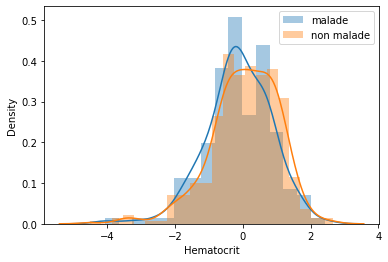

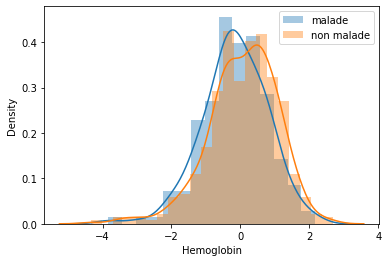

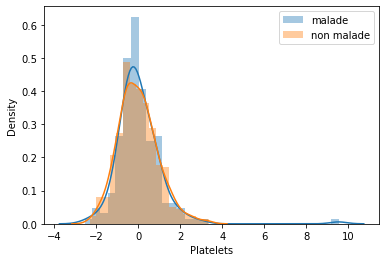

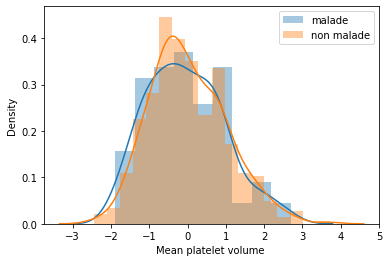

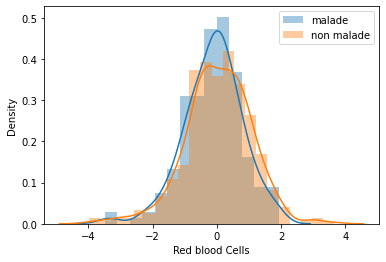

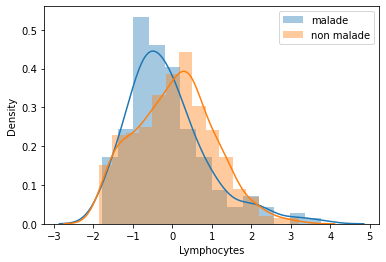

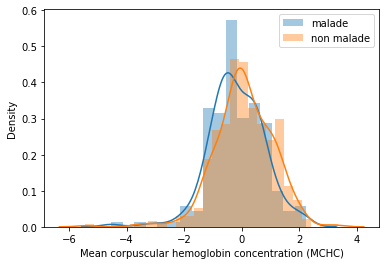

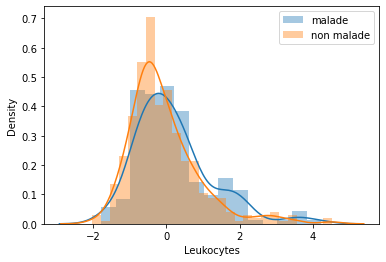

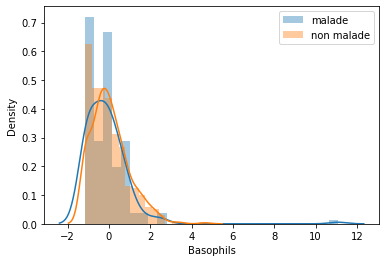

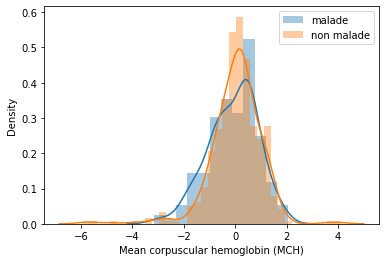

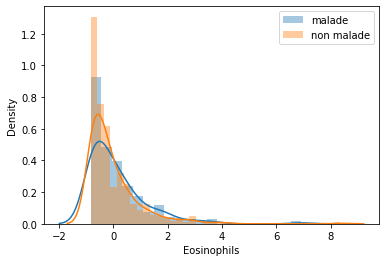

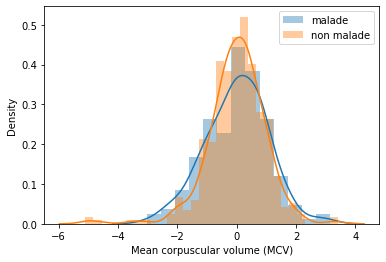

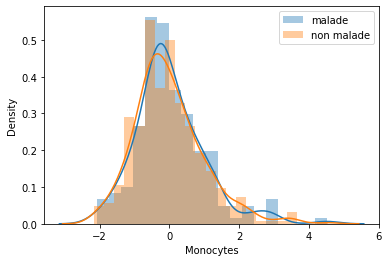

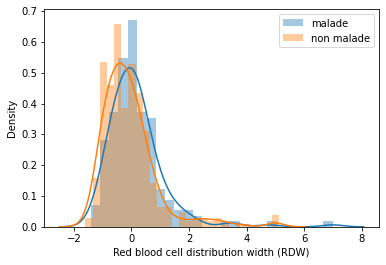

In [31]:
for col in  blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

In [32]:
def hospitalisatin(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return 'surveiellance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return 'soins intensifs'
    else :
        return 'inconnu'

In [33]:
df['statut']=df.apply(hospitalisatin, axis=1)

In [34]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0              NaN              NaN              NaN                   NaN   
1     not_detected     not_detected     not_detected          not_detected   
2              NaN              NaN              NaN                   NaN   
3              NaN              NaN              NaN                   NaN   
4     not_detected     not_detected     not_detected          not_detected   

   Metapneumovirus  Parainfluenza 2  Influenza B, rapid test  \
0              NaN              NaN                      NaN   
1     not_detected     not_detected                 negative   
2              NaN              NaN                      NaN   
3              NaN              NaN                      NaN   
4     not_detected     not_detected                      NaN   

   Influenza A, rapid test  est malade   statut  
0                      NaN       False  inconnu  
1                 negative        True  inconnu  
2                      NaN       False  inconnu  
3                      NaN       False  inconnu  
4                      NaN        True  inconnu  

[5 rows x 40 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

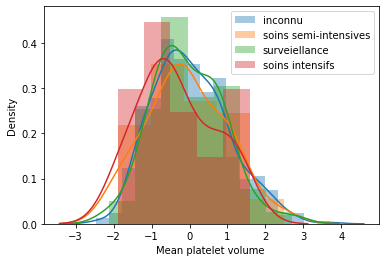

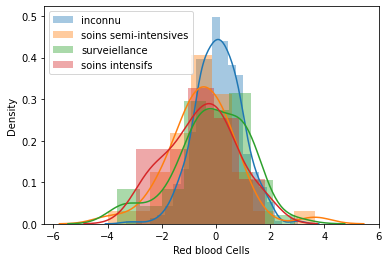

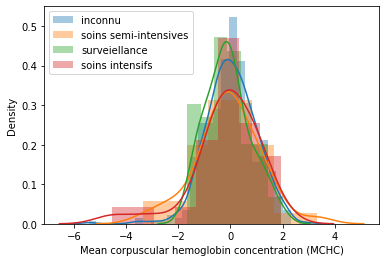

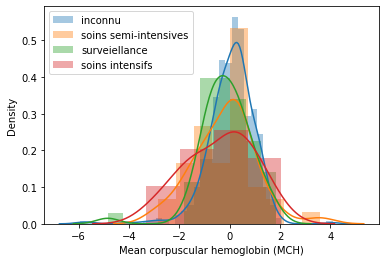

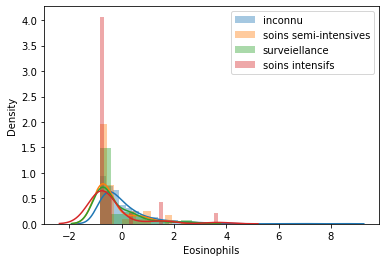

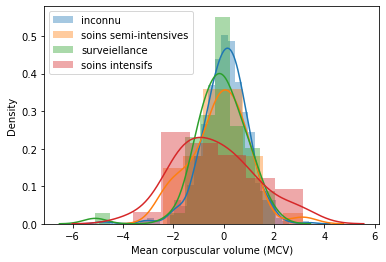

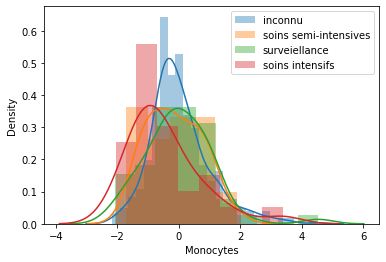

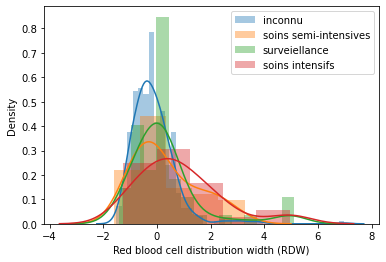

In [36]:
for col in  blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

In [37]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [38]:
df1=df[viral_columns[:-2]]
df1["covid"]=df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\Users\ELKHAD~1\AppData\Local\Temp/ipykernel_8620/3620484245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["covid"]=df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [39]:
df2=df[blood_columns[:-2]]
df2["covid"]=df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

C:\Users\ELKHAD~1\AppData\Local\Temp/ipykernel_8620/347305275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["covid"]=df['SARS-Cov-2 exam result']


negative    0.864775
positive    0.135225
Name: covid, dtype: float64

In [40]:
from scipy.stats import ttest_ind

In [41]:
positive_df.shape

(558, 38)

In [42]:
negative_df.shape

(5086, 38)

In [43]:
balanced_ned= negative_df.sample(positive_df.shape[0])

In [44]:
def t_test(col):
    alpha=0.02
    stat, p=ttest_ind(balanced_ned[col].dropna(),positive_df[col].dropna())
    if p<alpha:
        return 'H0 Rejetee'
    else:
        return 0

In [45]:
for col in blood_columns :
    print(f'{col:-<70} {t_test(col)}')

Hematocrit------------------------------------------------------------ 0
Hemoglobin------------------------------------------------------------ 0
Platelets------------------------------------------------------------- H0 Rejetee
Mean platelet volume ------------------------------------------------- H0 Rejetee
Red blood Cells------------------------------------------------------- 0
Lymphocytes----------------------------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)---------------------- 0
Leukocytes------------------------------------------------------------ H0 Rejetee
Basophils------------------------------------------------------------- 0
Mean corpuscular hemoglobin (MCH)------------------------------------- 0
Eosinophils----------------------------------------------------------- H0 Rejetee
Mean corpuscular volume (MCV)----------------------------------------- 0
Monocytes------------------------------------------------------------- H0 Rejetee
Red bl

In [46]:
df = data.copy()

In [47]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [48]:
missing_rate = df.isna().sum()/df.shape[0]

In [49]:
blood_columns=list( df.columns[(missing_rate<0.9) & (missing_rate>0.88)])
viral_columns= list( df.columns[(missing_rate<0.80) & (missing_rate>0.75)])

In [50]:
key_columns= ['Patient age quantile','SARS-Cov-2 exam result']

In [51]:
df=df[key_columns + blood_columns + viral_columns ]

In [52]:
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  ...  \
0                                               NaN         NaN  ...   
1                                          -0.95079    -0.09461  ...   
2                                               NaN         NaN  ...   
3                                               NaN         NaN  ...   
4                                               NaN         NaN  ...   

   Parainfluenza 3  Chlamydophila pneumoniae    Adenovirus  Parainfluenza 4  \
0              NaN                       NaN           NaN              NaN   
1     not_detected              not_detected  not_detected     not_detected   
2              NaN                       NaN           NaN              NaN   
3              NaN                       NaN           NaN              NaN   
4     not_detected              not_detected  not_detected     not_detected   

   Coronavirus229E  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis  \
0              NaN              NaN             NaN                  NaN   
1     not_detected     not_detected    not_detected         not_detected   
2              NaN              NaN             NaN                  NaN   
3              NaN              NaN             NaN                  NaN   
4     not_detected     not_detected    not_detected         not_detected   

  Metapneumovirus Parainfluenza 2  
0             NaN             NaN  
1    not_detected    not_detected  
2             NaN             NaN  
3             NaN             NaN  
4    not_detected    not_detected  

[5 rows x 33 columns]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
trainset,testset= train_test_split(df, test_size=0.2 , random_state=0)

In [55]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [56]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [57]:
def encodage(df):
    code={'positive':1 ,'negative':0, 'detected':1, 'not_detected':0}
    for col in df.select_dtypes('object'):
          df[col]=df[col].map(code)
    return df

In [58]:
def feature_engineering(df):
    df['est malade']=df[viral_columns].sum(axis=1)>=1
    df=df.drop(viral_columns,axis=1)
    return df

In [59]:
def imputation(df):
    #df['is na']=(df['Parainfluenza 3'].isna())  (df['Leukocytes'].isna())
    #df=df.fillna(-999)
    return df.dropna(axis=0)

In [60]:
def preprocessing(df):
    df=encodage(df)
    df=feature_engineering(df)
    df=imputation(df)
    x=df.drop('SARS-Cov-2 exam result',axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return x , y

In [61]:
x_train,y_train =preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\ELKHAD~1\AppData\Local\Temp/ipykernel_8620/3655832689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].map(code)
C:\Users\ELKHAD~1\AppData\Local\Temp/ipykernel_8620/1583863017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade']=df[viral_columns].sum(axis=1)>=1


In [62]:
x_test,y_test =preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\ELKHAD~1\AppData\Local\Temp/ipykernel_8620/3655832689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].map(code)
C:\Users\ELKHAD~1\AppData\Local\Temp/ipykernel_8620/1583863017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade']=df[viral_columns].sum(axis=1)>=1


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [112]:
preprocessor=make_pipeline(PolynomialFeatures(degree=2, interaction_only=False,  include_bias=False), SelectKBest( f_classif , k=10))

In [113]:
Randomforest=make_pipeline(preprocessor ,RandomForestClassifier(random_state=0 ))
AdaBoost=make_pipeline(preprocessor, AdaBoostClassifier(random_state=0 ))
SVM=make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN=make_pipeline(preprocessor, StandardScaler(),KNeighborsClassifier())

In [114]:
SelectKBest

sklearn.feature_selection._univariate_selection.SelectKBest

In [115]:
dict_of_models={'Randomforest':Randomforest,'AdaBoost':AdaBoost,'SVM':SVM,'KNN':KNN}

Randomforest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



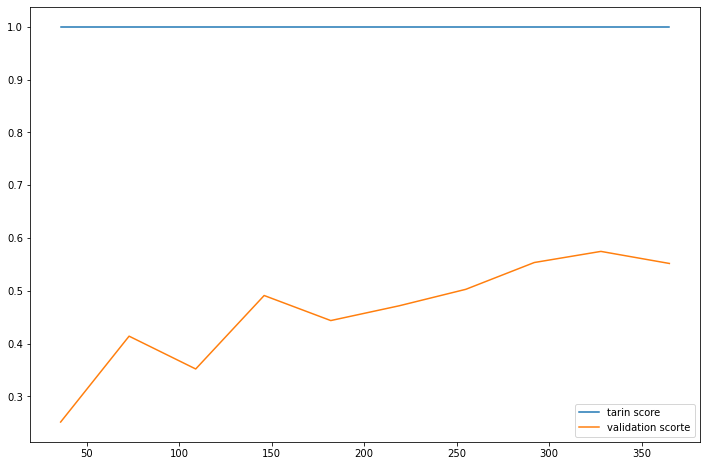

AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111



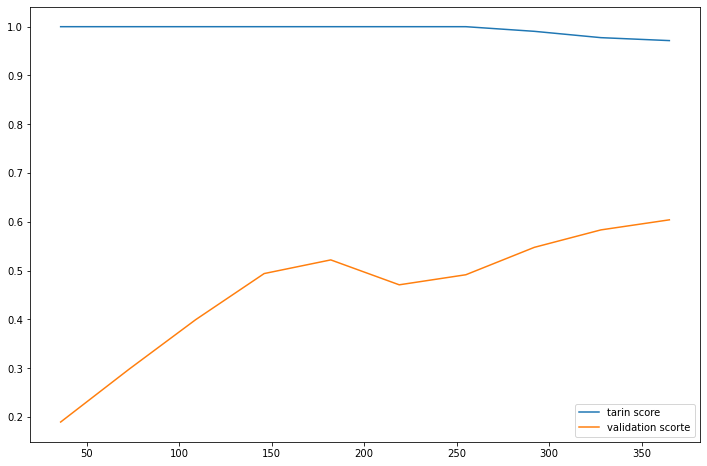

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71       111
weighted avg       0.87      0.88      0.87       111



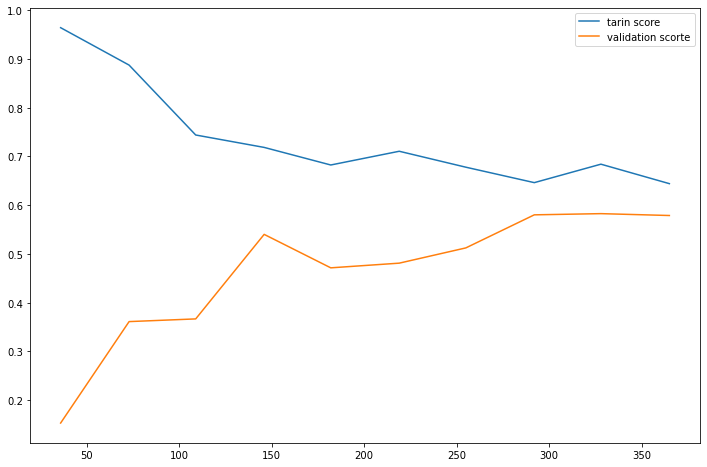

KNN
[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



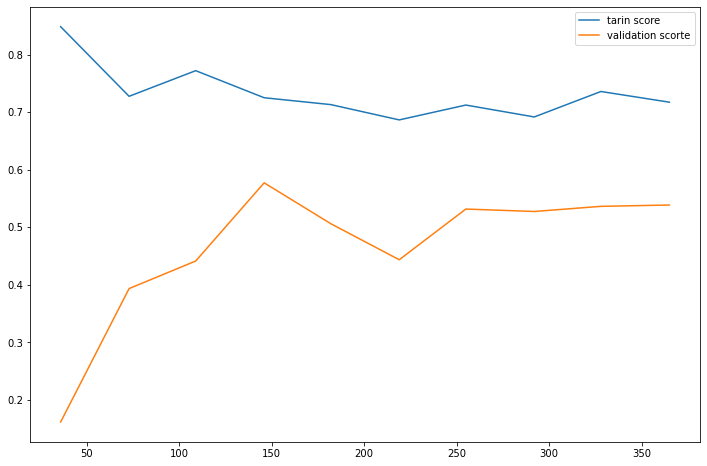

In [116]:
for name, model in dict_of_models.items():
    print(name)
    evaluation (model)

In [117]:
from sklearn.metrics import f1_score , confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [118]:
def evaluation (model):
    model.fit(x_train , y_train)
    ypred=model.predict(x_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    N, train_score, val_score=learning_curve(model,x_train, y_train, cv=4, scoring='f1',
                                            train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1), label='tarin score')
    plt.plot(N,val_score.mean(axis=1), label='validation scorte')
    plt.legend()
    plt.show()

In [119]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [147]:
hyper_params={'svc__gamma':[1e-3, 1e-4,0.0005],'svc__C':[1,10,100,1000,3000],'pipeline__polynomialfeatures__degree':[2,3],'pipeline__selectkbest__k':range(45,60)}

In [148]:
grid=RandomizedSearchCV(SVM , hyper_params, scoring='recall',cv=4, n_iter=40)       

In [149]:
grid.fit(x_train,y_train)
print(grid.best_params_)
y_pred=grid.predict(x_test)
print(classification_report(y_test,y_pred))


{'svc__gamma': 0.0001, 'svc__C': 3000, 'pipeline__selectkbest__k': 58, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        95
           1       0.50      0.50      0.50        16

    accuracy                           0.86       111
   macro avg       0.71      0.71      0.71       111
weighted avg       0.86      0.86      0.86       111



[[87  8]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        95
           1       0.50      0.50      0.50        16

    accuracy                           0.86       111
   macro avg       0.71      0.71      0.71       111
weighted avg       0.86      0.86      0.86       111



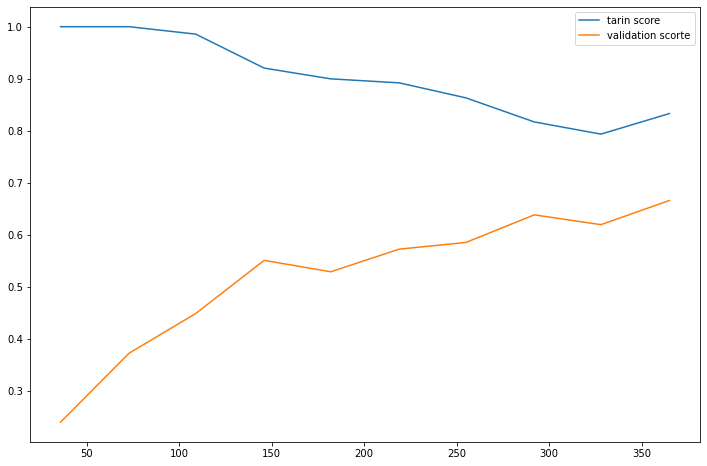

In [159]:
evaluation(grid.best_estimator_)

In [160]:
from sklearn.metrics import precision_recall_curve

In [161]:
precision, recall ,threshold= precision_recall_curve(y_test, grid.best_estimator_.decision_function(x_test))

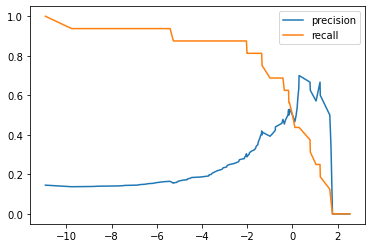

In [162]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [163]:
def model_final(model,x,threshold=0):
    return model.decision_function(x) > threshold

In [164]:
y_pred=model_final(grid.best_estimator_, x_test, threshold=-1)

In [165]:
from sklearn.metrics import recall_score

In [166]:
f1_score(y_test,y_pred)

0.5

In [167]:
recall_score(y_test,y_pred)

0.6875